In [13]:
#Import all required Libraries

import os
import random
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
import keras
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import MinMaxScaler
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [7]:
players = pd.read_csv('Players.csv')
players.head()

Unnamed: 0           Player     ...        birth_city  birth_state
0           0  Curly Armstrong     ...               NaN          NaN
1           1     Cliff Barker     ...          Yorktown      Indiana
2           2    Leo Barnhorst     ...               NaN          NaN
3           3       Ed Bartels     ...               NaN          NaN
4           4      Ralph Beard     ...       Hardinsburg     Kentucky

[5 rows x 8 columns]

In [8]:
players_data = pd.read_csv('player_data.csv')
players_data.head()

name                  ...                                                  college
0       Alaa Abdelnaby                  ...                                          Duke University
1      Zaid Abdul-Aziz                  ...                                    Iowa State University
2  Kareem Abdul-Jabbar                  ...                    University of California, Los Angeles
3   Mahmoud Abdul-Rauf                  ...                               Louisiana State University
4    Tariq Abdul-Wahad                  ...                                San Jose State University

[5 rows x 8 columns]

In [9]:
players_data.rename(columns={'name': 'Player'}, inplace=True)
players_data= players_data.fillna('No College')

In [10]:
final_df = pd.read_csv('Seasons_Stats.csv')
final_df.head()

Unnamed: 0    Year           Player  Pos  ...    BLK TOV     PF    PTS
0           0  1950.0  Curly Armstrong  G-F  ...    NaN NaN  217.0  458.0
1           1  1950.0     Cliff Barker   SG  ...    NaN NaN   99.0  279.0
2           2  1950.0    Leo Barnhorst   SF  ...    NaN NaN  192.0  438.0
3           3  1950.0       Ed Bartels    F  ...    NaN NaN   29.0   63.0
4           4  1950.0       Ed Bartels    F  ...    NaN NaN   27.0   59.0

[5 rows x 53 columns]

In [11]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

<a id="analysis" ></a>

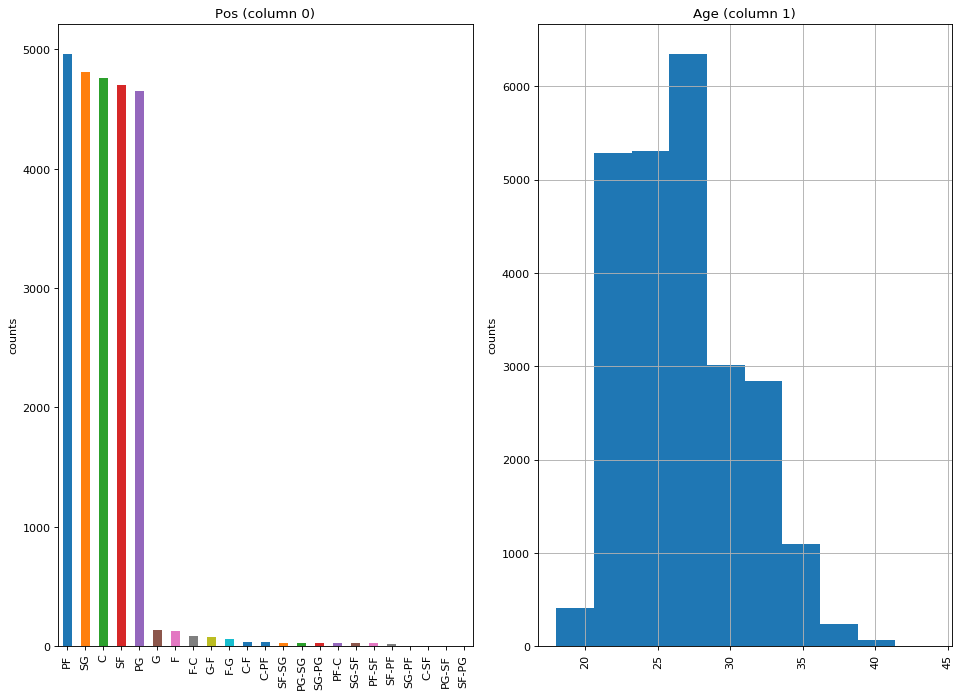

In [12]:
# Plot Players position and age distribution
plotPerColumnDistribution(final_df, 84, 10)

In [14]:
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

In [16]:
final_df['ppg'] = final_df.PTS/final_df.G
ppg = pd.DataFrame()
ppg['player'] = final_df.groupby('Player').mean()['ppg'].index
ppg['PPG'] = final_df.groupby('Player').mean()['ppg'].values
ppg= ppg.sort_values('PPG', ascending = False).head(10)

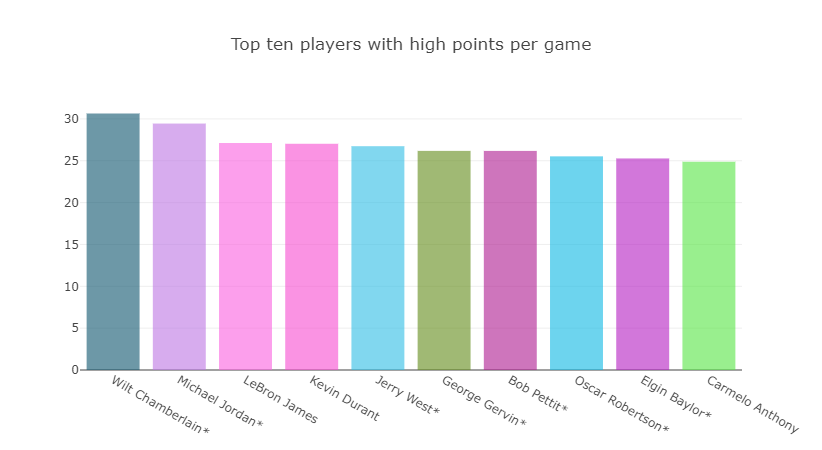

In [17]:
# Check Points per game
trace0 = go.Bar(
    x=ppg['player'].head(10),
    y=ppg['PPG'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high points per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

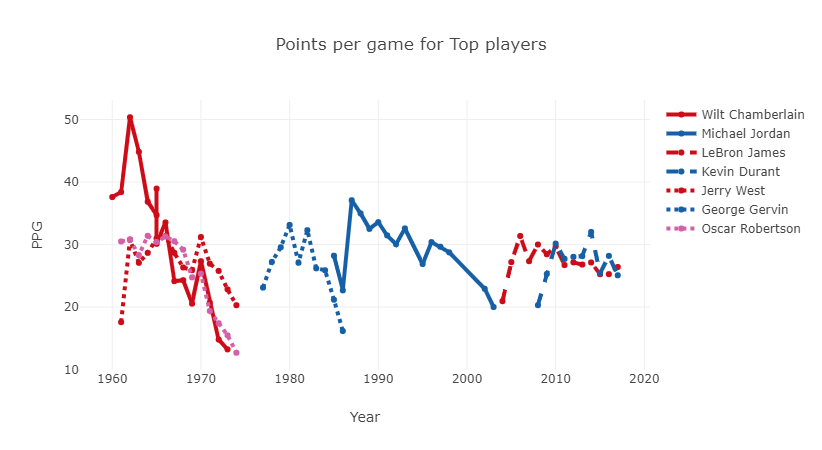

In [18]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wilt Chamberlain*'],
    y = final_df.ppg[final_df.Player == 'Wilt Chamberlain*'],
    name = 'Wilt Chamberlain',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Michael Jordan*'],
    y = final_df.ppg[final_df.Player == 'Michael Jordan*'],
    name = 'Michael Jordan',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.ppg[final_df.Player == 'LeBron James'],
    name = 'LeBron James',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') 
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Kevin Durant'],
    y = final_df.ppg[final_df.Player == 'Kevin Durant'],
    name = 'Kevin Durant',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Jerry West*'],
    y = final_df.ppg[final_df.Player == 'Jerry West*'],
    name = 'Jerry West',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'George Gervin*'],
    y = final_df.ppg[final_df.Player == 'George Gervin*'],
    name = 'George Gervin',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Bob Pettit'],
    y = final_df.ppg[final_df.Player == 'Bob Pettit'],
    name = 'Bob Pettit',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Oscar Robertson*'],
    y = final_df.ppg[final_df.Player == 'Oscar Robertson*'],
    name = 'Oscar Robertson',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data1 = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Points per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'PPG'),
              )

fig = dict(data=data1, layout=layout)
py.iplot(fig, filename='styled-line')

In [19]:
final_df['apg'] = final_df.AST/final_df.G
apg = pd.DataFrame()
apg['player'] = final_df.groupby('Player').mean()['apg'].index
apg['APG'] = final_df.groupby('Player').mean()['apg'].values
apg= apg.sort_values('APG', ascending = False).head(10)

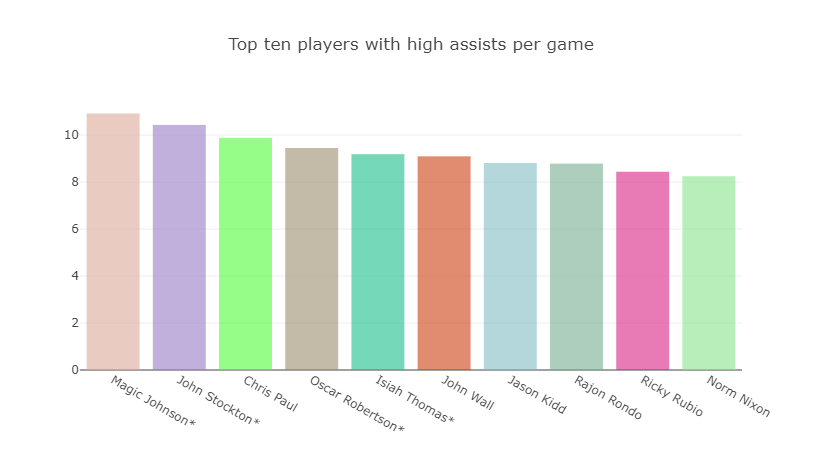

In [20]:
# Assists per game
trace0 = go.Bar(
    x=apg['player'].head(10),
    y=apg['APG'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high assists per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

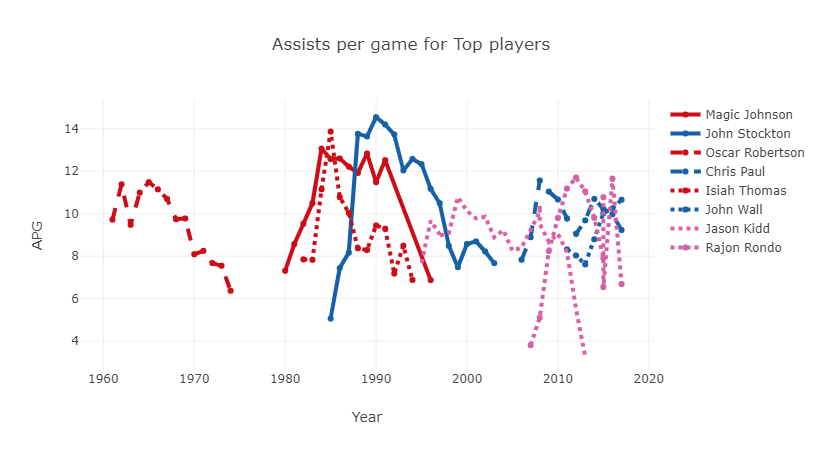

In [21]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Magic Johnson*'],
    y = final_df.apg[final_df.Player == 'Magic Johnson*'],
    name = 'Magic Johnson',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'John Stockton*'],
    y = final_df.apg[final_df.Player == 'John Stockton*'],
    name = 'John Stockton',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Oscar Robertson*'],
    y = final_df.apg[final_df.Player == 'Oscar Robertson*'],
    name = 'Oscar Robertson',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash')
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Chris Paul'],
    y = final_df.apg[final_df.Player == 'Chris Paul'],
    name = 'Chris Paul',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Isiah Thomas*'],
    y = final_df.apg[final_df.Player == 'Isiah Thomas*'],
    name = 'Isiah Thomas',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'John Wall'],
    y = final_df.apg[final_df.Player == 'John Wall'],
    name = 'John Wall',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Jason Kidd'],
    y = final_df.apg[final_df.Player == 'Jason Kidd'],
    name = 'Jason Kidd',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Rajon Rondo'],
    y = final_df.apg[final_df.Player == 'Rajon Rondo'],
    name = 'Rajon Rondo',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Assists per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'APG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

In [22]:
final_df['fgpg'] = final_df['FG']/final_df.G
fgpg = pd.DataFrame()
fgpg['player'] = final_df.groupby('Player').mean()['fgpg'].index
fgpg['FGPG'] = final_df.groupby('Player').mean()['fgpg'].values
fgpg= fgpg.sort_values('FGPG', ascending = False).head(10)

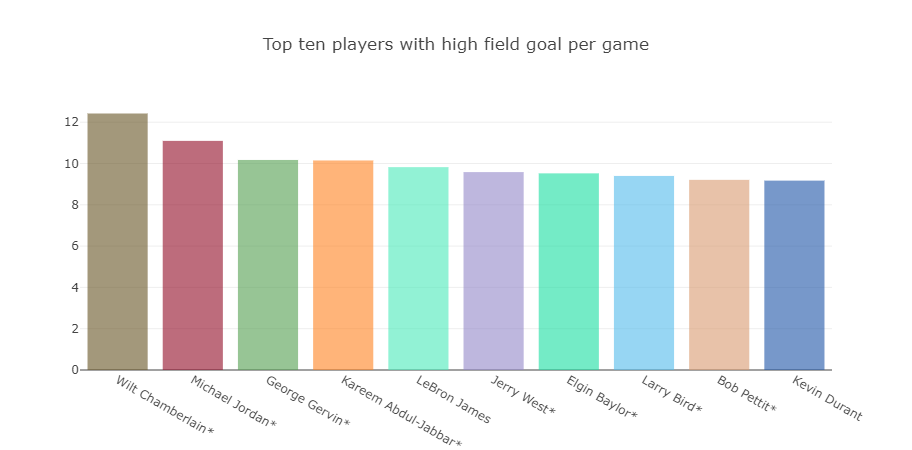

In [23]:
# Field goal per game
trace0 = go.Bar(
    x=fgpg['player'].head(10),
    y=fgpg['FGPG'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high field goal per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

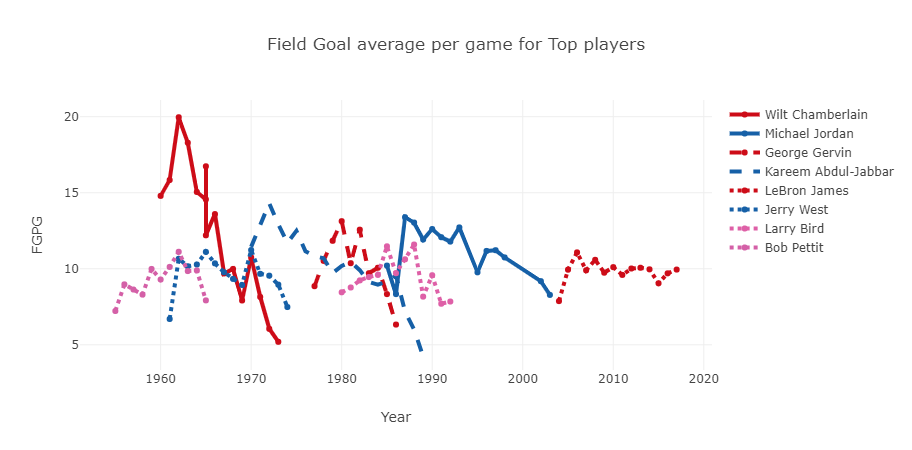

In [24]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wilt Chamberlain*'],
    y = final_df.fgpg[final_df.Player == 'Wilt Chamberlain*'],
    name = 'Wilt Chamberlain',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Michael Jordan*'],
    y = final_df.fgpg[final_df.Player == 'Michael Jordan*'],
    name = 'Michael Jordan',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'George Gervin*'],
    y = final_df.fgpg[final_df.Player == 'George Gervin*'],
    name = 'George Gervin',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash')
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Kareem Abdul-Jabbar*'],
    y = final_df.fgpg[final_df.Player == 'Kareem Abdul-Jabbar*'],
    name = 'Kareem Abdul-Jabbar',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.fgpg[final_df.Player == 'LeBron James'],
    name = 'LeBron James ',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Jerry West*'],
    y = final_df.fgpg[final_df.Player == 'Jerry West*'],
    name = 'Jerry West',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Larry Bird*'],
    y = final_df.fgpg[final_df.Player == 'Larry Bird*'],
    name = 'Larry Bird',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Bob Pettit*'],
    y = final_df.fgpg[final_df.Player == 'Bob Pettit*'],
    name = 'Bob Pettit',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Field Goal average per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

In [25]:
final_df['rpg'] = final_df.TRB/final_df.G
rpg = pd.DataFrame()
rpg['player'] = final_df.groupby('Player').mean()['rpg'].index
rpg['RPG'] = final_df.groupby('Player').mean()['rpg'].values
rpg= rpg.sort_values('RPG', ascending = False).head(10)

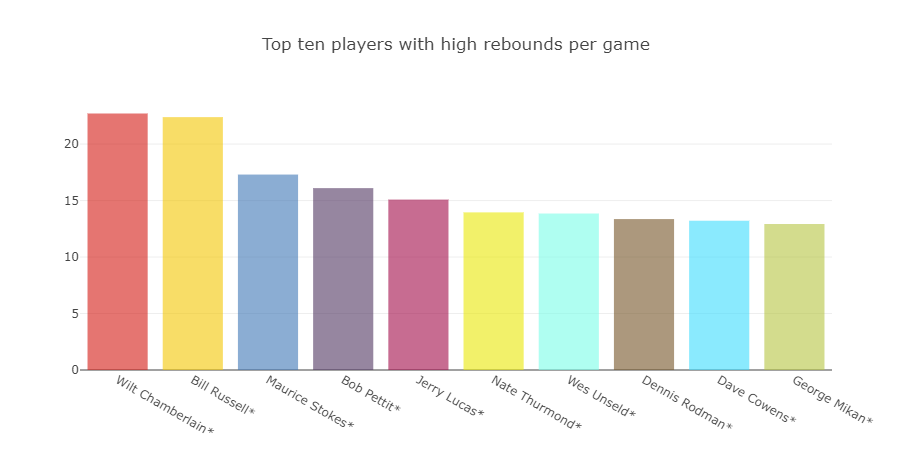

In [27]:
# Rebounds per game
trace0 = go.Bar(
    x=rpg['player'].head(10),
    y=rpg['RPG'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high rebounds per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

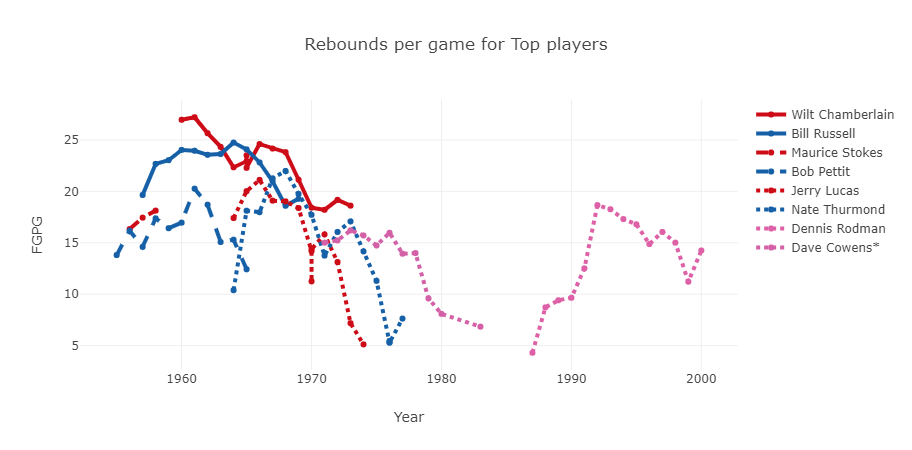

In [28]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wilt Chamberlain*'],
    y = final_df.rpg[final_df.Player == 'Wilt Chamberlain*'],
    name = 'Wilt Chamberlain',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Bill Russell*'],
    y = final_df.rpg[final_df.Player == 'Bill Russell*'],
    name = 'Bill Russell',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Maurice Stokes*'],
    y = final_df.rpg[final_df.Player == 'Maurice Stokes*'],
    name = 'Maurice Stokes',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash')
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Bob Pettit*'],
    y = final_df.rpg[final_df.Player == 'Bob Pettit*'],
    name = 'Bob Pettit',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Jerry Lucas*'],
    y = final_df.rpg[final_df.Player == 'Jerry Lucas*'],
    name = 'Jerry Lucas ',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Nate Thurmond*'],
    y = final_df.rpg[final_df.Player == 'Nate Thurmond*'],
    name = 'Nate Thurmond',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dennis Rodman*'],
    y = final_df.rpg[final_df.Player == 'Dennis Rodman*'],
    name = 'Dennis Rodman',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dave Cowens*'],
    y = final_df.rpg[final_df.Player == 'Dave Cowens*'],
    name = 'Dave Cowens*',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Rebounds per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

In [29]:
final_df['tpg'] = final_df.TOV/final_df.G
tpg = pd.DataFrame()
tpg['player'] = final_df.groupby('Player').mean()['tpg'].index
tpg['TPG'] = final_df.groupby('Player').mean()['tpg'].values
tpg= tpg.sort_values('TPG', ascending = False).head(10)

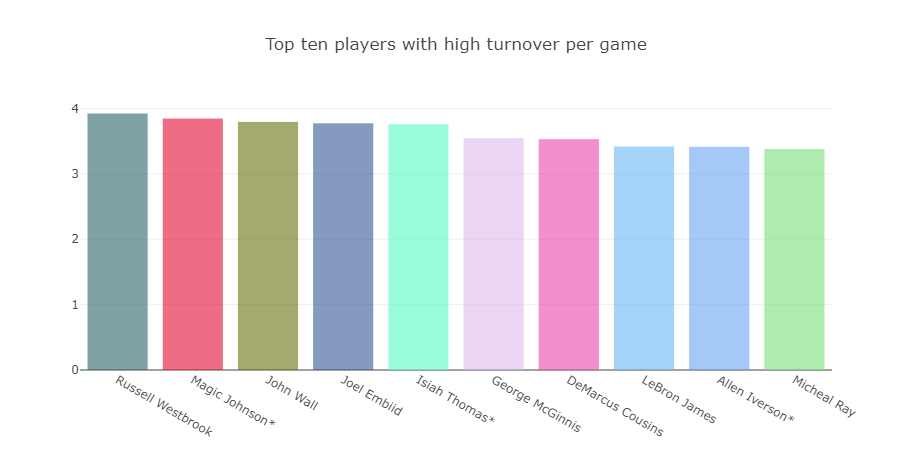

In [30]:
# Turnover per game
trace0 = go.Bar(
    x=tpg['player'].head(10),
    y=tpg['TPG'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high turnover per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

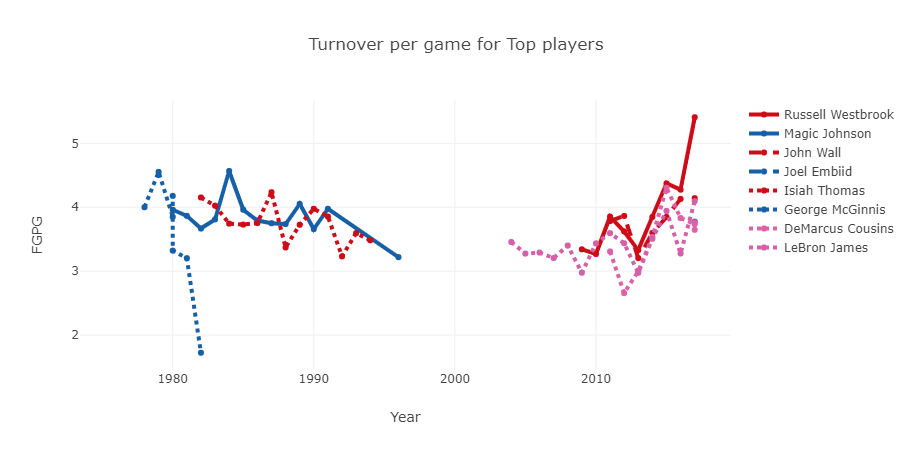

In [31]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Russell Westbrook'],
    y = final_df.tpg[final_df.Player == 'Russell Westbrook'],
    name = 'Russell Westbrook',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Magic Johnson*'],
    y = final_df.tpg[final_df.Player == 'Magic Johnson*'],
    name = 'Magic Johnson',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'John Wall'],
    y = final_df.tpg[final_df.Player == 'John Wall'],
    name = 'John Wall',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') 
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Joel Embiid'],
    y = final_df.tpg[final_df.Player == 'Joel Embiid'],
    name = 'Joel Embiid',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Isiah Thomas*'],
    y = final_df.tpg[final_df.Player == 'Isiah Thomas*'],
    name = 'Isiah Thomas ',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'George McGinnis'],
    y = final_df.tpg[final_df.Player == 'George McGinnis'],
    name = 'George McGinnis',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'DeMarcus Cousins'],
    y = final_df.tpg[final_df.Player == 'DeMarcus Cousins'],
    name = 'DeMarcus Cousins',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.tpg[final_df.Player == 'LeBron James'],
    name = 'LeBron James',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Turnover per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

In [33]:
final_df['twoppg'] = final_df['2P']/final_df.G
twoppg = pd.DataFrame()
twoppg['player'] = final_df.groupby('Player').mean()['twoppg'].index
twoppg['twoppg'] = final_df.groupby('Player').mean()['twoppg'].values
twoppg= twoppg.sort_values('twoppg', ascending = False).head(10)

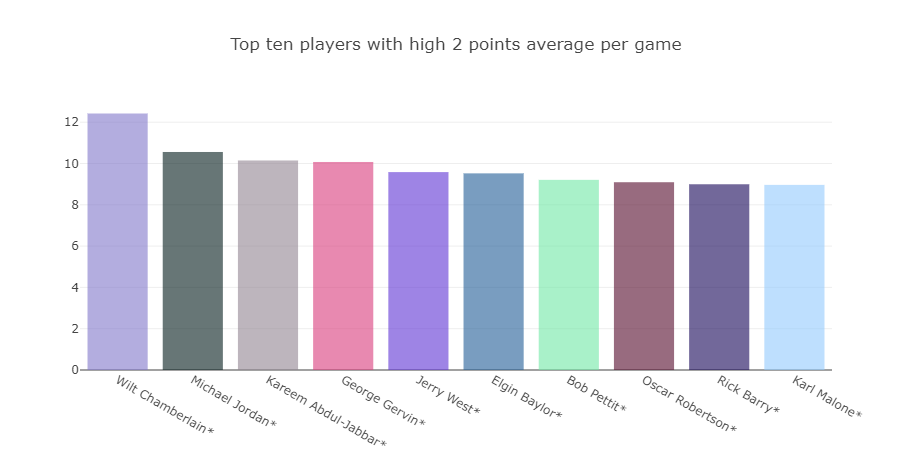

In [34]:
# 2 points per game
trace0 = go.Bar(
    x=twoppg['player'].head(10),
    y=twoppg['twoppg'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high 2 points average per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

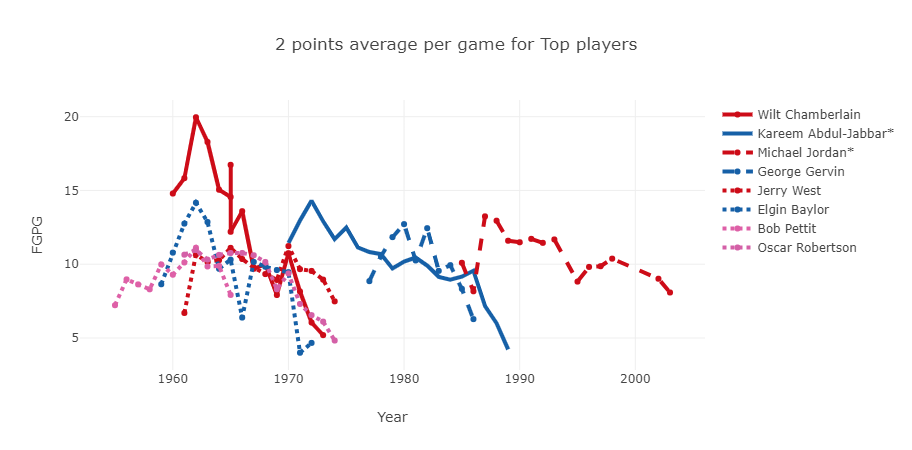

In [35]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wilt Chamberlain*'],
    y = final_df.twoppg[final_df.Player == 'Wilt Chamberlain*'],
    name = 'Wilt Chamberlain',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Kareem Abdul-Jabbar*'],
    y = final_df.twoppg[final_df.Player == 'Kareem Abdul-Jabbar*'],
    name = 'Kareem Abdul-Jabbar*',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Michael Jordan*'],
    y = final_df.twoppg[final_df.Player == 'Michael Jordan*'],
    name = 'Michael Jordan*',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash')
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'George Gervin*'],
    y = final_df.twoppg[final_df.Player == 'George Gervin*'],
    name = 'George Gervin',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Jerry West*'],
    y = final_df.twoppg[final_df.Player == 'Jerry West*'],
    name = 'Jerry West ',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Elgin Baylor*'],
    y = final_df.twoppg[final_df.Player == 'Elgin Baylor*'],
    name = 'Elgin Baylor',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Bob Pettit*'],
    y = final_df.twoppg[final_df.Player == 'Bob Pettit*'],
    name = 'Bob Pettit',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Oscar Robertson*'],
    y = final_df.twoppg[final_df.Player == 'Oscar Robertson*'],
    name = 'Oscar Robertson',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = '2 points average per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

In [37]:
final_df['threeppg'] = final_df['3P']/final_df.G
threeppg = pd.DataFrame()
threeppg['player'] = final_df.groupby('Player').mean()['threeppg'].index
threeppg['threeppg'] = final_df.groupby('Player').mean()['threeppg'].values
threeppg= threeppg.sort_values('threeppg', ascending = False).head(10)

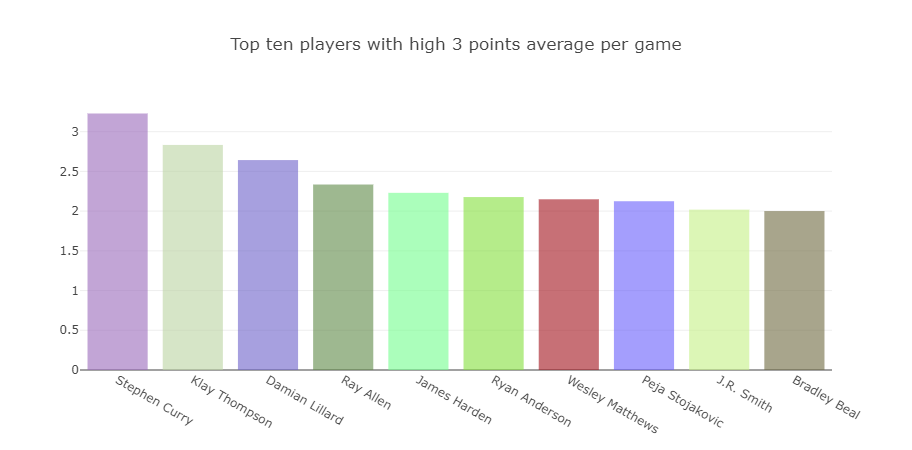

In [38]:
# 3 points per game
trace0 = go.Bar(
    x=threeppg['player'].head(10),
    y=threeppg['threeppg'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high 3 points average per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

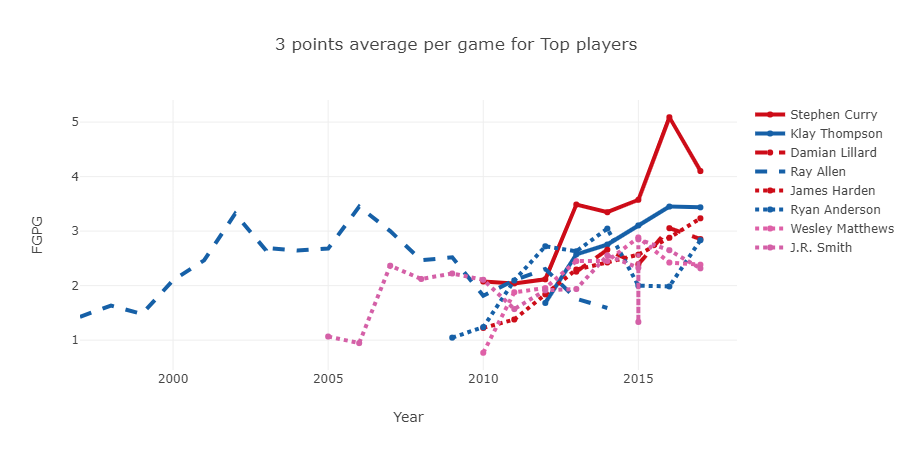

In [39]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Stephen Curry'],
    y = final_df.threeppg[final_df.Player == 'Stephen Curry'],
    name = 'Stephen Curry',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Klay Thompson'],
    y = final_df.threeppg[final_df.Player == 'Klay Thompson'],
    name = 'Klay Thompson',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Damian Lillard'],
    y = final_df.threeppg[final_df.Player == 'Damian Lillard'],
    name = 'Damian Lillard',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash')
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Ray Allen'],
    y = final_df.threeppg[final_df.Player == 'Ray Allen'],
    name = 'Ray Allen',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'James Harden'],
    y = final_df.threeppg[final_df.Player == 'James Harden'],
    name = 'James Harden ',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Ryan Anderson'],
    y = final_df.threeppg[final_df.Player == 'Ryan Anderson'],
    name = 'Ryan Anderson',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wesley Matthews'],
    y = final_df.threeppg[final_df.Player == 'Wesley Matthews'],
    name = 'Wesley Matthews',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'J.R. Smith'],
    y = final_df.threeppg[final_df.Player == 'J.R. Smith'],
    name = 'J.R. Smith',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = '3 points average per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

In [43]:
final_df['dpg'] = final_df['DRB']/final_df.G
dpg = pd.DataFrame()
dpg['player'] = final_df.groupby('Player').mean()['dpg'].index
dpg['dpg'] = final_df.groupby('Player').mean()['dpg'].values
dpg= dpg.sort_values('dpg', ascending = False).head(10)

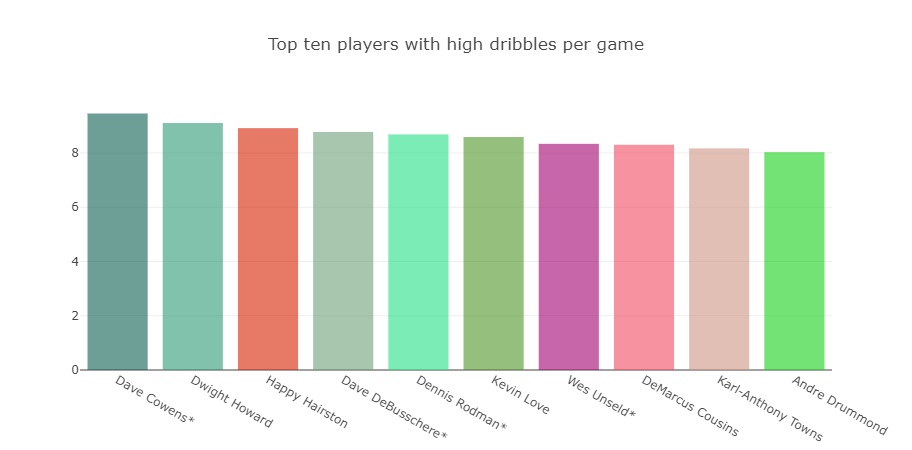

In [44]:
# Dribbles per game
trace0 = go.Bar(
    x=dpg['player'].head(10),
    y=dpg['dpg'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high dribbles per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

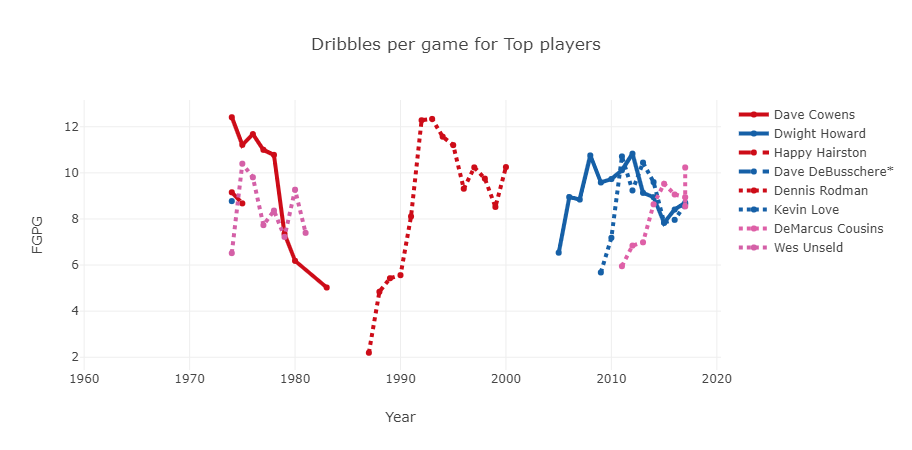

In [45]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dave Cowens*'],
    y = final_df.dpg[final_df.Player == 'Dave Cowens*'],
    name = 'Dave Cowens',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dwight Howard'],
    y = final_df.dpg[final_df.Player == 'Dwight Howard'],
    name = 'Dwight Howard',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Happy Hairston'],
    y = final_df.dpg[final_df.Player == 'Happy Hairston'],
    name = 'Happy Hairston',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash')
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dave DeBusschere*'],
    y = final_df.dpg[final_df.Player == 'Dave DeBusschere*'],
    name = 'Dave DeBusschere*',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dennis Rodman*'],
    y = final_df.dpg[final_df.Player == 'Dennis Rodman*'],
    name = 'Dennis Rodman',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Kevin Love'],
    y = final_df.dpg[final_df.Player == 'Kevin Love'],
    name = 'Kevin Love',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'DeMarcus Cousins'],
    y = final_df.dpg[final_df.Player == 'DeMarcus Cousins'],
    name = 'DeMarcus Cousins',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wes Unseld*'],
    y = final_df.dpg[final_df.Player == 'Wes Unseld*'],
    name = 'Wes Unseld',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Dribbles per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

In [46]:
players_data['career'] = players_data["year_end"] - players_data["year_start"]
lengthy_career = pd.DataFrame()
lengthy_career['player'] = players_data.groupby('Player').mean()['career'].index
lengthy_career['career_length'] = players_data.groupby('Player').mean()['career'].values
lengthy_career= lengthy_career.sort_values('career_length', ascending = False).head(10)

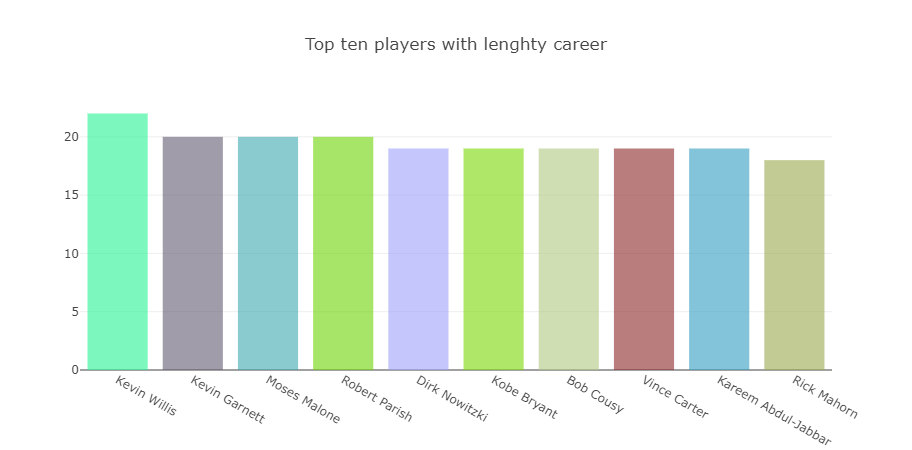

In [47]:
# Players career length
trace0 = go.Bar(
    x=lengthy_career['player'].head(10),
    y=lengthy_career['career_length'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with lenghty career',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

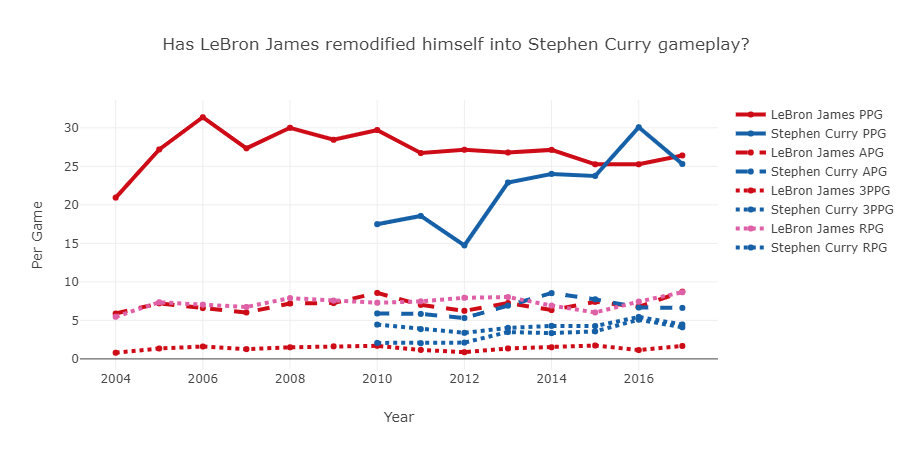

In [48]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.ppg[final_df.Player == 'LeBron James'],
    name = 'LeBron James PPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Stephen Curry'],
    y = final_df.ppg[final_df.Player == 'Stephen Curry'],
    name = 'Stephen Curry PPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.apg[final_df.Player == 'LeBron James'],
    name = 'LeBron James APG',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash')
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Stephen Curry'],
    y = final_df.apg[final_df.Player == 'Stephen Curry'],
    name = 'Stephen Curry APG',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.threeppg[final_df.Player == 'LeBron James'],
    name = 'LeBron James 3PPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Stephen Curry'],
    y = final_df.threeppg[final_df.Player == 'Stephen Curry'],
    name = 'Stephen Curry 3PPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.rpg[final_df.Player == 'LeBron James'],
    name = 'LeBron James RPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Stephen Curry'],
    y = final_df.rpg[final_df.Player == 'Stephen Curry'],
    name = 'Stephen Curry RPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(21, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Has LeBron James remodified himself into Stephen Curry gameplay? ',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Per Game'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

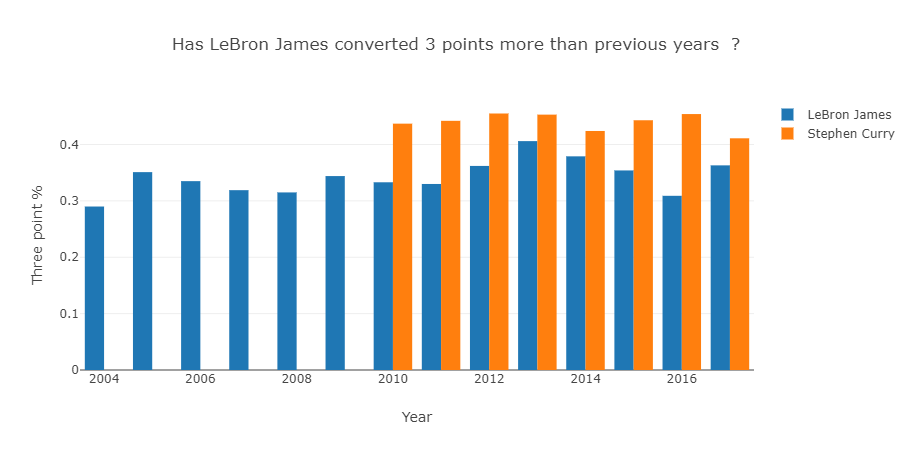

In [49]:
trace1 = go.Bar(
    x=final_df.Year[final_df.Player == 'LeBron James'],
    y=final_df['3P%'][final_df.Player == 'LeBron James'],
    name='LeBron James'
)
trace2 = go.Bar(
    x=final_df.Year[final_df.Player == 'Stephen Curry'],
    y=final_df['3P%'][final_df.Player == 'Stephen Curry'],
    name='Stephen Curry'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = 'Has LeBron James converted 3 points more than previous years  ? ',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Three point %')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

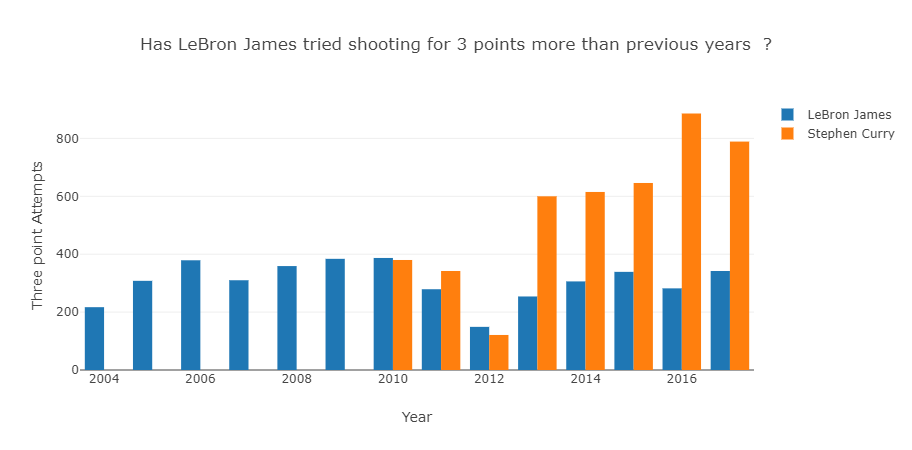

In [50]:
trace1 = go.Bar(
    x=final_df.Year[final_df.Player == 'LeBron James'],
    y=final_df['3PA'][final_df.Player == 'LeBron James'],
    name='LeBron James'
)
trace2 = go.Bar(
    x=final_df.Year[final_df.Player == 'Stephen Curry'],
    y=final_df['3PA'][final_df.Player == 'Stephen Curry'],
    name='Stephen Curry'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = 'Has LeBron James tried shooting for 3 points more than previous years  ? ',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Three point Attempts')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

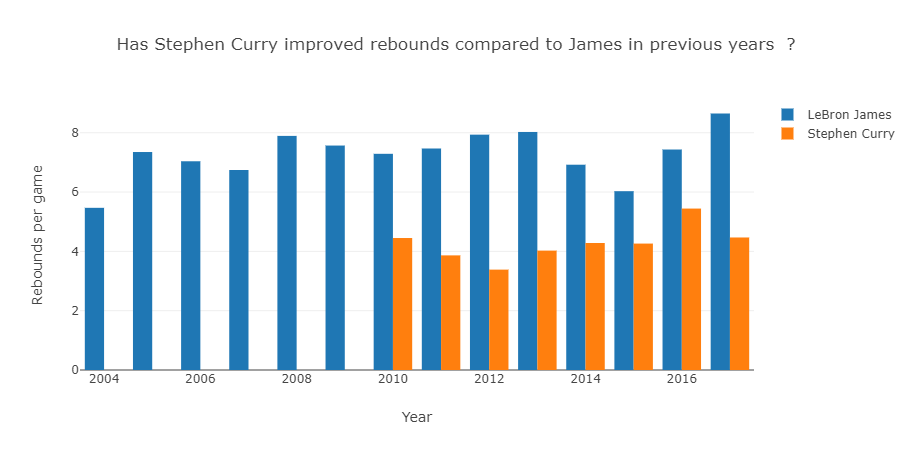

In [51]:
trace1 = go.Bar(
    x=final_df.Year[final_df.Player == 'LeBron James'],
    y=final_df['rpg'][final_df.Player == 'LeBron James'],
    name='LeBron James'
)
trace2 = go.Bar(
    x=final_df.Year[final_df.Player == 'Stephen Curry'],
    y=final_df['rpg'][final_df.Player == 'Stephen Curry'],
    name='Stephen Curry'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = 'Has Stephen Curry improved rebounds compared to James in previous years  ? ',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Rebounds per game')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

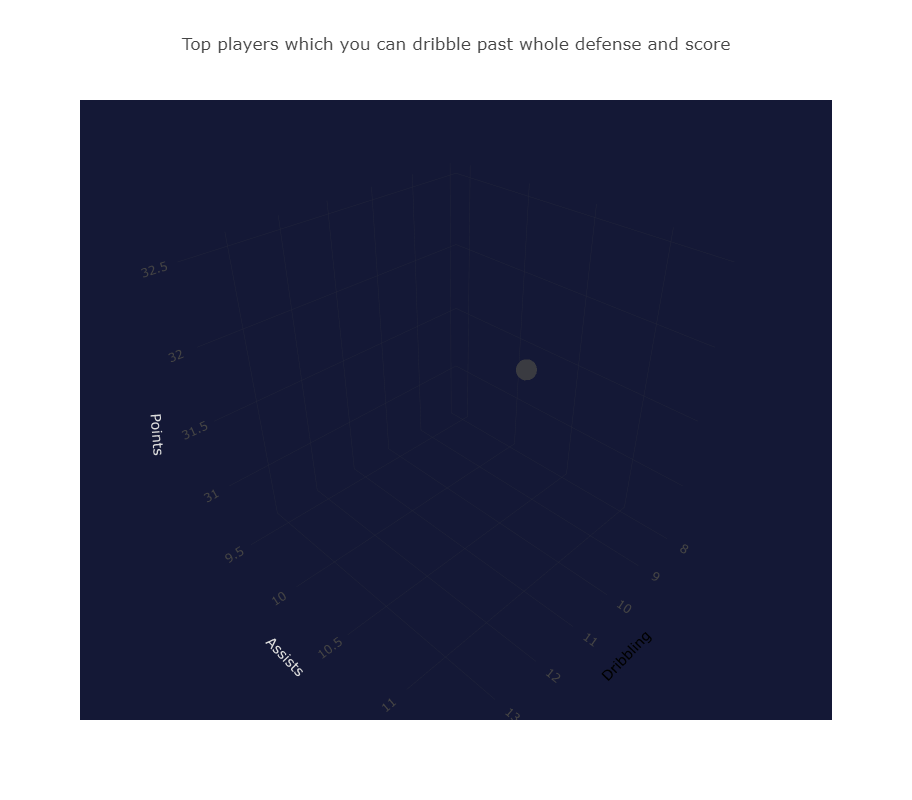

In [52]:
# Player who can dribble past the defense and score/assists 
trace1 = go.Scatter3d(
    x=final_df['dpg'].where(final_df['dpg'] > 8.0),
    y=final_df['apg'].where(final_df['apg'] > 8.0),
    z=final_df['ppg'].where(final_df['ppg'] > 25.0),
    text = final_df.Player,
    mode='markers',
    marker=dict(
        size=12,
        color=random_colors(50),              
        colorscale='Viridis', 
        opacity=0.8
    )
)

data = [trace1]
layout=go.Layout(width=800, height=800, title = 'Top players which you can dribble past whole defense and score ',
              scene = dict(xaxis=dict(title='Dribbling',
                                      titlefont=dict(color='Orange')),
                            yaxis=dict(title='Assists',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            zaxis=dict(title='Points',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            bgcolor = 'rgb(20, 24, 54)'
                           )
             )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

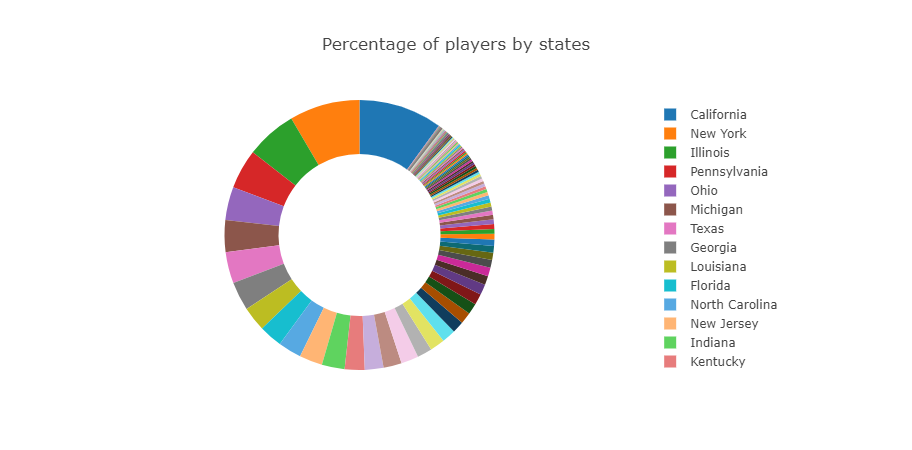

In [53]:
# Which state has produced more NBA players?
county_count = players['birth_state'].value_counts()
trace = go.Pie(labels=county_count.index, values=county_count.values, hole=0.6,textinfo= "none")
layout = go.Layout(
    title='Percentage of players by states'
)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig, filename="plotting-library")

In [55]:
college_DA = ' '.join(players_data['college'].tolist())
college_DAA = "".join(str(v) for v in college_DA).lower()

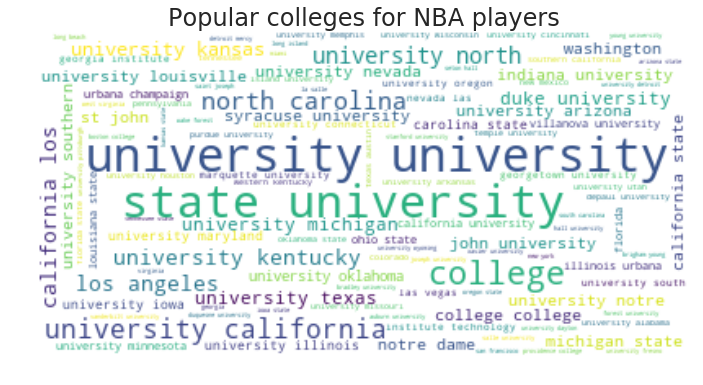

In [56]:
# College producing more number of NBA players
sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(background_color="white").generate(college_DAA)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Popular colleges for NBA players',size=24)
plt.show()

In [58]:
train = final_df.drop(['Player','Pos','blanl', 'blank2', 'Tm'], axis=1)

In [59]:
train= train.fillna(0)
train.head()

Unnamed: 0    Year   Age     G   GS ...   rpg  tpg    twoppg  threeppg  dpg
0           0  1950.0  31.0  63.0  0.0 ...   0.0  0.0  2.285714       0.0  0.0
1           1  1950.0  29.0  49.0  0.0 ...   0.0  0.0  2.081633       0.0  0.0
2           2  1950.0  25.0  67.0  0.0 ...   0.0  0.0  2.597015       0.0  0.0
3           3  1950.0  24.0  15.0  0.0 ...   0.0  0.0  1.466667       0.0  0.0
4           4  1950.0  24.0  13.0  0.0 ...   0.0  0.0  1.615385       0.0  0.0

[5 rows x 56 columns]

In [60]:
X = train.drop(['ppg'], axis=1).as_matrix()
y = train['ppg'].as_matrix()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [62]:
# Random Forest + GridSearchCV 
RFR = RandomForestRegressor()
parameters = {'n_estimators': [5, 10, 100],
              #'criterion': ['mse'],
              #'max_depth': [5, 10, 15], 
              #'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1,5]
             }
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, 
                        n_jobs=-1,
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

RFR = grid_obj.best_estimator_

RFR.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.0min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [63]:
predictions = RFR.predict(X_val)

y_validation_RF = y_val

print('R2 score = ',r2_score(y_validation_RF, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_validation_RF, predictions), '/ 0.0')

R2 score =  0.9976606478785013 / 1.0
MSE score =  0.0872189668884081 / 0.0


In [62]:
predictions = RFR.predict(X_test)

y_test_RF = y_test

print('R2 score = ',r2_score(y_test_RF, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test_RF, predictions), '/ 0.0')

R2 score =  0.9974758085590506 / 1.0
MSE score =  0.09768323549547969 / 0.0


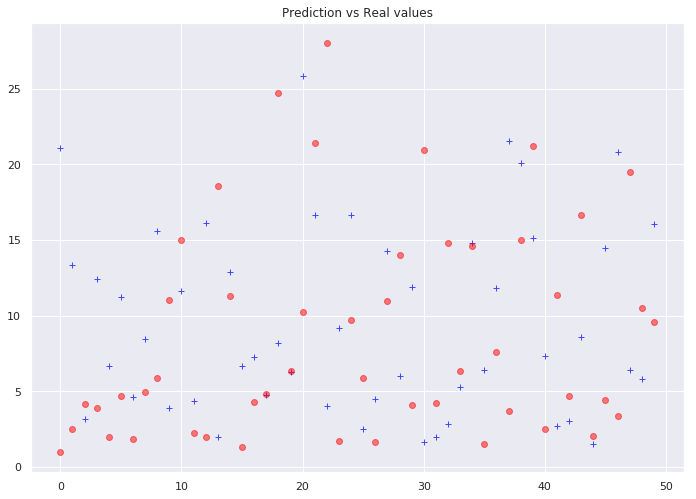

In [64]:
plt.plot(y_validation_RF[0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

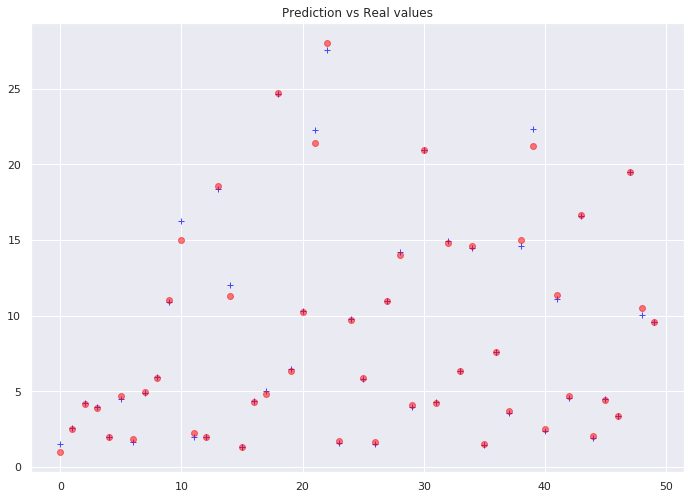

In [65]:
plt.plot(y_test_RF[0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

In [66]:
features = np.array(X_train)
targets = np.array(y_train.reshape(y_train.shape[0],1))
features_validation= np.array(X_val)
targets_validation = np.array(y_val.reshape(y_val.shape[0],1))
features_test= np.array(X_test)
targets_test = np.array(y_test.reshape(y_test.shape[0],1))

print(features[:10])
print(targets[:10])

[[ 2.44460000e+04  2.01700000e+03  2.10000000e+01  1.40000000e+01
   0.00000000e+00  7.20000000e+01  1.68000000e+01  5.41000000e-01
   1.94000000e-01  9.70000000e-02  1.34000000e+01  1.16000000e+01
   1.25000000e+01  4.90000000e+00  7.00000000e-01  2.10000000e+00
   5.80000000e+00  2.04000000e+01  1.00000000e-01  0.00000000e+00
   1.00000000e-01  9.80000000e-02 -9.00000000e-01 -3.00000000e+00
  -3.80000000e+00  0.00000000e+00  1.60000000e+01  3.10000000e+01
   5.16000000e-01  1.00000000e+00  6.00000000e+00  1.67000000e-01
   1.50000000e+01  2.50000000e+01  6.00000000e-01  5.32000000e-01
   2.00000000e+00  3.00000000e+00  6.67000000e-01  9.00000000e+00
   8.00000000e+00  1.70000000e+01  2.00000000e+00  1.00000000e+00
   2.00000000e+00  2.00000000e+00  7.00000000e+00  3.50000000e+01
   1.42857143e-01  1.14285714e+00  1.21428571e+00  1.42857143e-01
   1.07142857e+00  7.14285714e-02  5.71428571e-01]
 [ 5.74000000e+03  1.98000000e+03  2.80000000e+01  5.00000000e+00
   0.00000000e+00  7.2000

In [67]:
model = Sequential()
model.add(Dense(200, input_dim=55, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               11200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 37,651
Trainable params: 37,651
Non-trainable params: 0
_________________________________________________________________


Step :  0 / 1000
15801/15801 [==============================] - 0s 28us/step
Training MSE: 0.1163118533461458
3951/3951 [==============================] - 0s 26us/step
Validation MSE: 0.1199189892330522 

Step :  250 / 1000
15801/15801 [==============================] - 0s 25us/step
Training MSE: 0.4004920809700945
3951/3951 [==============================] - 0s 26us/step
Validation MSE: 0.41930002232075825 

Step :  500 / 1000
15801/15801 [==============================] - 0s 24us/step
Training MSE: 0.004634828238363308
3951/3951 [==============================] - 0s 24us/step
Validation MSE: 0.006359894515631116 

Step :  750 / 1000
15801/15801 [==============================] - 0s 23us/step
Training MSE: 0.015536043642899913
3951/3951 [==============================] - 0s 23us/step
Validation MSE: 0.018160564825174492 



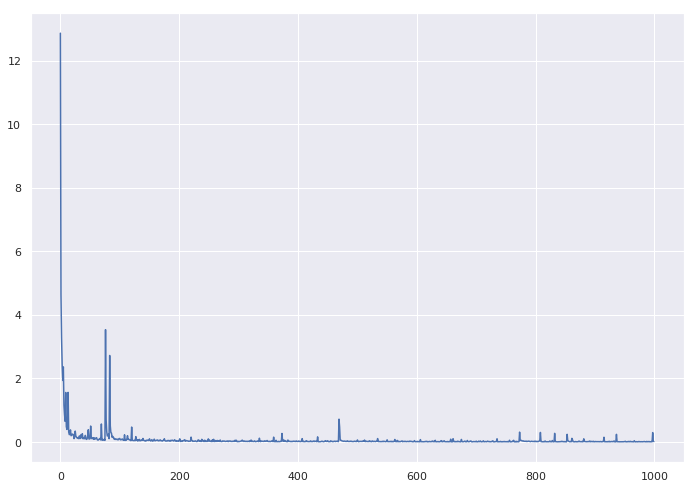

In [68]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
hist =np.array([])

for i in range(epochs_ratio):
    history = model.fit(features, targets, epochs=epochs_step, batch_size=100, verbose=0)
    
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(features, targets)
    print("Training MSE:", score[1])
    score = model.evaluate(features_validation, targets_validation)
    print("Validation MSE:", score[1], "\n")
    hist = np.concatenate((hist, np.array(history.history['mean_squared_error'])), axis = 0)
    
plt.plot(hist)
plt.show()

In [69]:
predictions = model.predict(features_validation, verbose=0)

print('R2 score = ',r2_score(y_val, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_val, predictions), '/ 0.0')


R2 score =  0.9995129046661501 / 1.0
MSE score =  0.01816056309100771 / 0.0


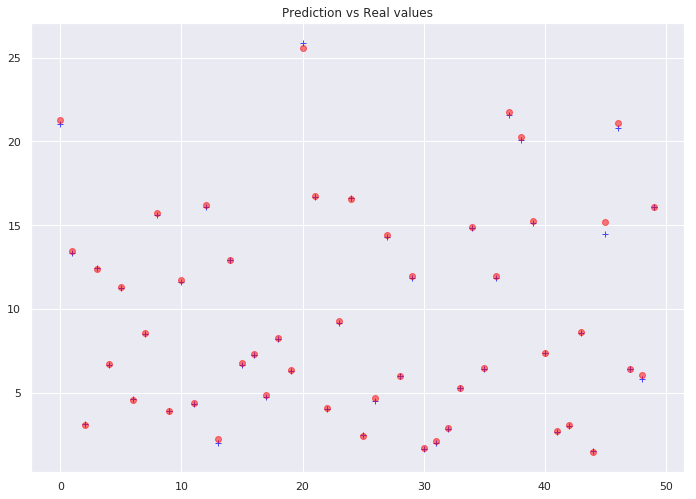

In [70]:
plt.plot(y_val[0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

In [71]:
predictions = model.predict(features_test, verbose=0)

print('R2 score = ',r2_score(y_test, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, predictions), '/ 0.0')


R2 score =  0.9994489645090384 / 1.0
MSE score =  0.021324424430234572 / 0.0


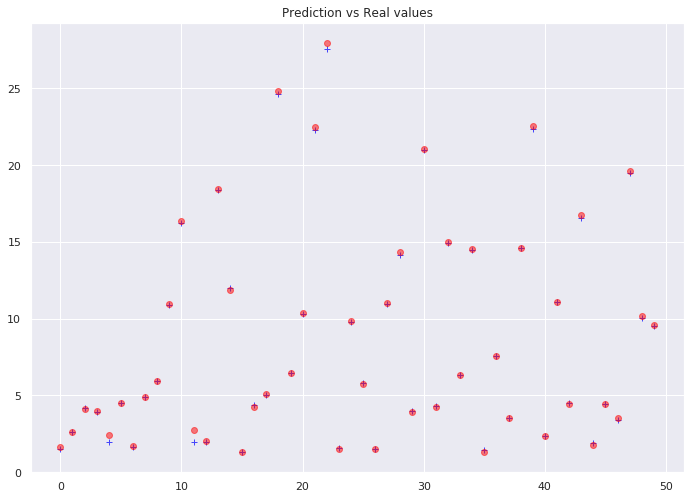

In [72]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()